In [100]:
import pandas as pd
import datetime
import numpy as np 



from sklearn import datasets
import seaborn as sns


import matplotlib.pyplot as plt



In [94]:
df = pd.read_csv('covid19_deaths.csv')
df
# read the datsets

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.000000,0.131687,0.013758
1,Australia,Australia,0,2020-01-08,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.000000,0.200985,0.021040
2,Australia,Australia,0,2020-01-15,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.000000,0.250854,0.026496
3,Australia,Australia,0,2020-01-22,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.000000,0.623252,0.065824
4,Australia,Australia,0,2020-01-29,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.000000,0.326629,0.034648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11710,United States,United States,USA,2021-03-14,2021,11,317812460,58076,7022.0,58898.357320,-822.357322,51054.0,2.209479,-0.258756,-0.013962
11711,United States,United States,USA,2021-03-21,2021,12,317812460,57996,6938.0,58534.957320,-538.957322,51058.0,2.183048,-0.169583,-0.009207
11712,United States,United States,USA,2021-03-28,2021,13,316020313,55007,9514.0,57810.357320,-2803.357322,45493.0,3.010566,-0.887081,-0.048492
11713,United States,United States,USA,2021-04-04,2021,14,316020313,55265,6684.0,57736.557320,-2471.557322,48581.0,2.115054,-0.782088,-0.042807


In [195]:
df.columns
# To know all column in my dataset

Index(['country', 'region', 'region_code', 'start_date', 'year', 'week',
       'population', 'total_deaths', 'covid_deaths', 'expected_deaths',
       'excess_deaths', 'non_covid_deaths', 'covid_deaths_per_100k',
       'excess_deaths_per_100k', 'excess_deaths_pct_change'],
      dtype='object')

In [198]:
df.isna().sum()
#find sum of the  null value , also we can find null by using info()

country                     0
region                      0
region_code                 0
start_date                  0
year                        0
week                        0
population                  0
total_deaths                0
covid_deaths                0
expected_deaths             0
excess_deaths               0
non_covid_deaths            0
covid_deaths_per_100k       0
excess_deaths_per_100k      0
excess_deaths_pct_change    0
dtype: int64

In [101]:
df.describe()
#to view some basic statistical details like percentile, mean, std  ...

,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
count,11715.000000,11715.000000,1.171500e+04,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000,11715.000000
mean,2020.203927,23.115322,1.115783e+07,2160.281861,249.987751,1872.656236,287.625625,1910.294110,2.144536,2.290059,0.141454
std,0.402932,15.789753,2.921175e+07,5860.294477,998.592679,4985.142151,1350.148074,5099.567164,3.341416,4.679702,0.298217
min,2020.000000,1.000000,8.466700e+04,3.000000,-270.000000,2.000000,-6361.757322,-1723.000000,-8.803323,-16.019891,-0.823949
25%,2020.000000,9.000000,1.359711e+06,279.000000,1.000000,257.175625,-5.531544,253.000000,0.047474,-0.257874,-0.015423
50%,2020.000000,20.000000,4.648794e+06,883.000000,24.000000,814.000000,27.073081,805.000000,0.899928,1.141500,0.069270
75%,2020.000000,37.000000,8.570146e+06,1624.000000,141.000000,1410.509584,147.225093,1421.500000,2.926926,3.372990,0.204734
max,2021.000000,53.000000,3.283005e+08,86388.000000,23481.000000,63308.370990,27036.540030,70504.000000,63.283242,80.863108,6.350086


In [102]:
df.value_counts()
# to counts of unique values

country        region     region_code  start_date  year  week  population  total_deaths  covid_deaths  expected_deaths  excess_deaths  non_covid_deaths  covid_deaths_per_100k  excess_deaths_per_100k  excess_deaths_pct_change
Australia      Australia  0            2020-01-01  2020  1     25734100    2497          0.0           2463.111657       33.888343     2497.0            0.000000                0.131687                0.013758                   1
Spain          Valencia   10           2020-12-16  2020  51    4948411     1020          131.0         923.250000        96.750000     889.0             2.647314                1.955173                0.104793                   1
                                       2020-12-30  2020  53    4948411     331           80.0          281.750000        49.250000     251.0             1.616681                0.995269                0.174800                   1
                                       2021-01-01  2021  1     4948411     1273      

In [106]:
df.country.value_counts()

United States     3591
Spain             1420
Italy             1160
Chile             1056
Britain            980
France             966
Denmark             70
Netherlands         70
South Africa        70
Peru                70
Estonia             70
Switzerland         69
Belgium             69
Germany             69
Bulgaria            69
Norway              69
Austria             69
Lithuania           69
Slovenia            68
New Zealand         68
Sweden              68
Latvia              68
Portugal            68
Poland              67
Finland             67
Hungary             67
Colombia            67
Luxembourg          66
Greece              66
Croatia             65
Mexico              65
Czech Republic      65
Cyprus              65
Slovakia            65
Malta               64
Iceland             64
Israel              63
South Korea         62
Romania             60
Tunisia             58
Montenegro          57
Australia           57
Canada              54
Turkey     

In [104]:
df.region.unique()

array(['Australia', 'Austria', 'Belgium', 'England and Wales',
       'North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'East', 'London', 'South East',
       'South West', 'Wales', 'Scotland', 'Northern Ireland', 'Britain',
       'Bulgaria', 'Canada', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Libertador General Bernardo OHiggins',
       'Maule', 'Biobio', 'Araucanía', 'Los Lagos',
       "General Carlos Ibáñez del Campo's Aysén",
       'Magellan and Chilean Antarctica', 'Santiago Metropolitan',
       'Los Ríos', 'Arica y Parinacota', 'Chile', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Brittany',
       'Centre-Val de Loire', 'Corsica', 'Grand Est', 'Hauts-de-France',
       'Île-de-France (Paris)', 'Normandy', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur",

In [171]:
df.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Britain', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Israel', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Montenegro', 'Netherlands',
       'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Tunisia', 'Turkey',
       'United States'], dtype=object)

In [105]:
df.drop_duplicates
#drop duplicate
#there is no duplicate in this dataset

<bound method DataFrame.drop_duplicates of              country         region region_code  start_date  year  week  \
0          Australia      Australia           0  2020-01-01  2020     1   
1          Australia      Australia           0  2020-01-08  2020     2   
2          Australia      Australia           0  2020-01-15  2020     3   
3          Australia      Australia           0  2020-01-22  2020     4   
4          Australia      Australia           0  2020-01-29  2020     5   
...              ...            ...         ...         ...   ...   ...   
11710  United States  United States         USA  2021-03-14  2021    11   
11711  United States  United States         USA  2021-03-21  2021    12   
11712  United States  United States         USA  2021-03-28  2021    13   
11713  United States  United States         USA  2021-04-04  2021    14   
11714  United States  United States         USA  2021-04-11  2021    15   

       population  total_deaths  covid_deaths  expected_

In [78]:
df['population']=df.population.astype('int')
df['population']

#convert number of population from string to int to make it esay for any one read the column

0         25734100
1         25734100
2         25734100
3         25734100
4         25734100
           ...    
11710    317812460
11711    317812460
11712    316020313
11713    316020313
11714    316020313
Name: population, Length: 11715, dtype: int32

In [138]:
#df['excess_deaths_per_100k']=df.excess_deaths_per_100k.astype(float)
#s=df['excess_deaths_per_100k']*100
#s

In [137]:
#df['covid_deaths_per_100k']=df.covid_deaths_per_100k.astype(float)
#s=df['covid_deaths_per_100k']*100
#s


In [91]:
df.sample(30)

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
1152,Britain,Britain,K02000001,2020-11-21,2020,48,66435550,14132,3373.0,11764.317060,2367.682940,10759.0,5.0,3.563879,0.201260
11086,United States,Texas,TX,2020-11-29,2020,49,28995881,5656,1194.0,4118.362343,1537.637657,4462.0,4.0,5.302952,0.373361
10698,United States,Pennsylvania,PA,2019-12-29,2020,1,12801989,2783,0.0,2888.647838,-105.647838,2783.0,0.0,-0.825246,-0.036573
3045,France,Centre-Val de Loire,24,2020-04-15,2020,16,2576252,633,81.0,496.752500,136.247500,552.0,3.0,5.288594,0.274276
3317,France,Île-de-France (Paris),11,2020-03-18,2020,12,12174880,2303,262.0,1519.922500,783.077500,2041.0,2.0,6.431911,0.515209
3597,France,Pays de la Loire,52,2020-04-15,2020,16,3757600,727,67.0,676.547500,50.452500,660.0,1.0,1.342679,0.074573
3760,France,France,0,2020-10-07,2020,41,64639133,11824,569.0,11211.805000,612.195000,11255.0,0.0,0.947097,0.054603
338,Britain,North West,E12000002,2020-01-18,2020,4,7292093,1529,0.0,1658.257050,-129.257050,1529.0,0.0,-1.772564,-0.077948
5366,Lithuania,Lithuania,0,2020-05-18,2020,21,2793694,715,5.0,720.621067,-5.621067,710.0,0.0,-0.201206,-0.007800
6680,Spain,Balearics,4,2021-03-12,2021,11,1176627,151,3.0,166.000000,-15.000000,148.0,0.0,-1.274831,-0.090361


In [202]:
pop = df.population.replace(',', '')
pop
#remove space

0         25734100
1         25734100
2         25734100
3         25734100
4         25734100
           ...    
11710    317812460
11711    317812460
11712    316020313
11713    316020313
11714    316020313
Name: population, Length: 11715, dtype: int64

In [33]:
s = df.expected_deaths.replace(',', '')
s

0         2463.111657
1         2458.278324
2         2436.444991
3         2436.611657
4         2425.944991
             ...     
11710    58898.357320
11711    58534.957320
11712    57810.357320
11713    57736.557320
11714    57356.757320
Name: expected_deaths, Length: 11715, dtype: float64

In [38]:
country =df.country.str.strip()
country
#remove whitespace


0            Australia
1            Australia
2            Australia
3            Australia
4            Australia
             ...      
11710    United States
11711    United States
11712    United States
11713    United States
11714    United States
Name: country, Length: 11715, dtype: object

In [40]:
region =df.region.str.strip()
region
#remove whitespace


0            Australia
1            Australia
2            Australia
3            Australia
4            Australia
             ...      
11710    United States
11711    United States
11712    United States
11713    United States
11714    United States
Name: region, Length: 11715, dtype: object

In [158]:

df['excess_deaths_per_100k'] = df['excess_deaths_per_100k'].apply(lambda x: x*100)
df['covid_deaths_per_100k'] = df['covid_deaths_per_100k'].apply(lambda x: x*100)
# convert into %
df.head()

,country,region,region_code,start_date,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2020-01-01,2020,1,25734100,2497,0.0,2463.111657,33.888343,2497.0,0.0,13.168653,0.013758
1,Australia,Australia,0,2020-01-08,2020,2,25734100,2510,0.0,2458.278324,51.721676,2510.0,0.0,20.098498,0.021040
2,Australia,Australia,0,2020-01-15,2020,3,25734100,2501,0.0,2436.444991,64.555009,2501.0,0.0,25.085396,0.026496
3,Australia,Australia,0,2020-01-22,2020,4,25734100,2597,0.0,2436.611657,160.388343,2597.0,0.0,62.325219,0.065824
4,Australia,Australia,0,2020-01-29,2020,5,25734100,2510,0.0,2425.944991,84.055009,2510.0,0.0,32.662891,0.034648


In [121]:
df[df.year==2020].covid_deaths.sum()

#total covide deaths in 2020

1834317.5

In [98]:
df[df.year==2020].covid_deaths.sum()/365
# #total covide deaths in 2020 per day

5025.527397260274

In [95]:
df[df.year==2021].covid_deaths.sum()

#total covide deaths in 2021


1094289.0

In [175]:
df[df.year==2021].covid_deaths.sum()/365
# #total covide deaths in 2021 per day

2998.0520547945207

In [172]:
df[df.year==2020].non_covid_deaths.sum()
#totalon_covid_deaths in 2020

17856580.5

In [ ]:
df[df.year==2020].non_covid_deaths.sum()/365
# #total non_covid_deaths in 2020 per day

In [173]:
df[df.year==2021].non_covid_deaths.sum()
#total on_covid_deaths in 2021

4522515.0

In [174]:
df[df.year==2021].non_covid_deaths.sum()/365
# #total non_covid_deaths in 2021 per day

12390.452054794521

In [176]:
df.groupby('year').total_deaths.sum()
#the total deaths in 2020-2021

year
2020    19690898
2021     5616804
Name: total_deaths, dtype: int64

In [96]:
(df[df.year==2021].covid_deaths.sum() + df[df.year==2020].covid_deaths.sum()) / 730
##total covide deaths in 2020-2021 per day

4011.789726027397

In [156]:
df[df.year==2020].total_deaths.sum()

19690898

In [177]:
df[df.year==2021].total_deaths.sum()

5616804

In [157]:
df[df.year==2020].non_covid_deaths.sum()

17856580.5

In [139]:
#d= plt.figure(figsize=(10,3)) # the size of figure
#sns.countplot(data=df,x='country') #  countplot used to Show the counts of observations in each categorical bin using bars
#plt.xticks(rotation=90)
#plt.show()
#What are the country where covid-19 deaths were highest in 2020-2021?

<AxesSubplot:xlabel='country'>

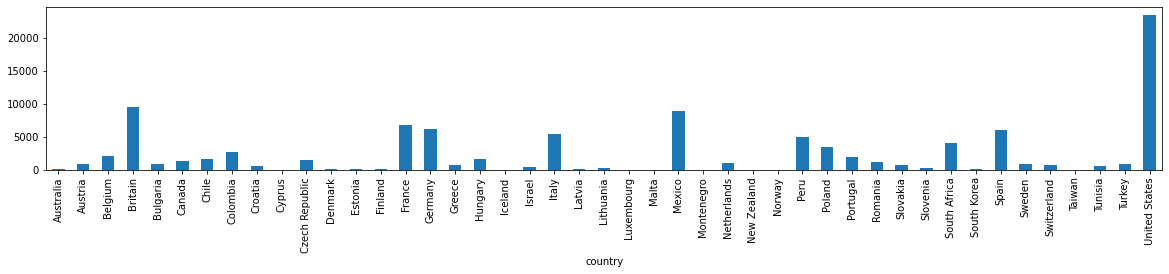

In [43]:
df.groupby('country').covid_deaths.max().plot(kind='bar', figsize=(20,3))
#What are the countries where covid-19 deaths were highest in 2020-2021
#another solution

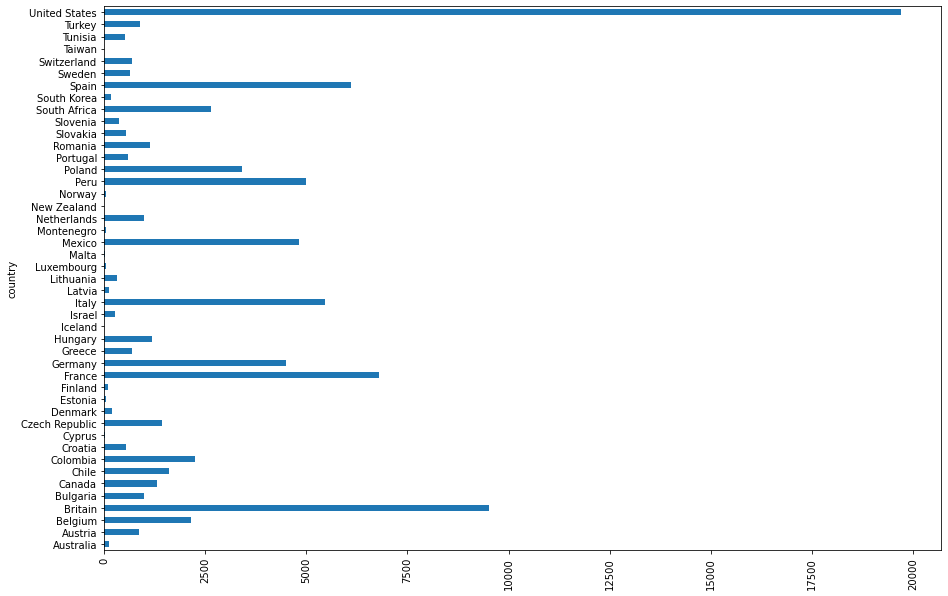

In [140]:
#df[df.year==2020].covid_deaths.country.value_counts().plot(kind='barh');
plt.figure(figsize=(15,10))
df[df.year==2020].groupby('country').covid_deaths.max().plot(kind='barh');
plt.xticks(rotation=90)
plt.show()
# #What are the countries where covid-19 deaths were highest in 2020

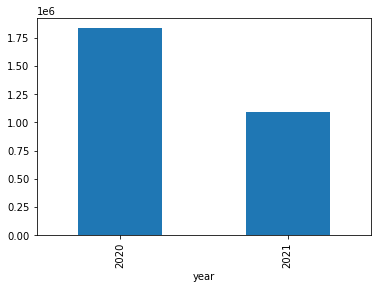

In [26]:
d=df.groupby('year').covid_deaths.sum().plot(kind='bar')

#In which year did covid deaths rise?


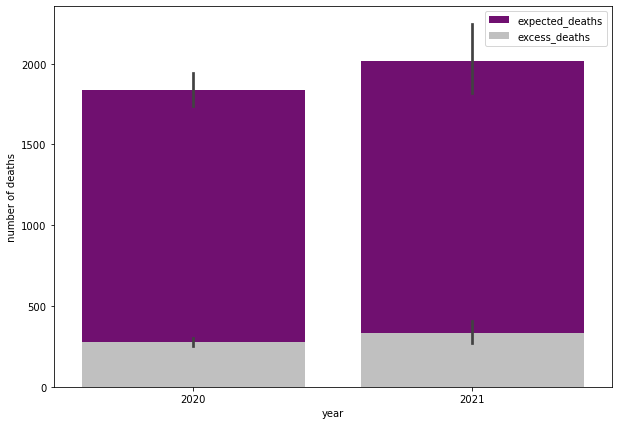

In [168]:

# Comparison between expected_deaths in 2020-2021 and excess_deaths in 2020-2021

plt.figure(figsize=(10,7))
sns.barplot(data=df , x='year', y = 'expected_deaths', color = 'Purple', label = 'expected_deaths')
sns.barplot(data=df , x='year', y = 'excess_deaths', color = 'Silver', label = 'excess_deaths')
plt.ylabel(ylabel =' number of deaths ')
plt.legend()
plt.show()

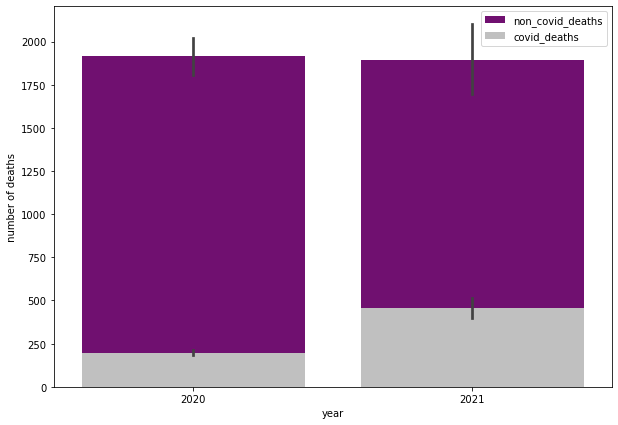

In [153]:

plt.figure(figsize=(10,7))
sns.barplot(data=df , x='year', y = 'non_covid_deaths', color = 'Purple', label = 'non_covid_deaths')
sns.barplot(data=df , x='year', y = 'covid_deaths', color = 'Silver', label = 'covid_deaths')
plt.ylabel(ylabel =' number of deaths ')
plt.legend()
plt.show()



# #Comparison between covid-19 deaths in 2020-2021 and non-covid-death in 2020-2021

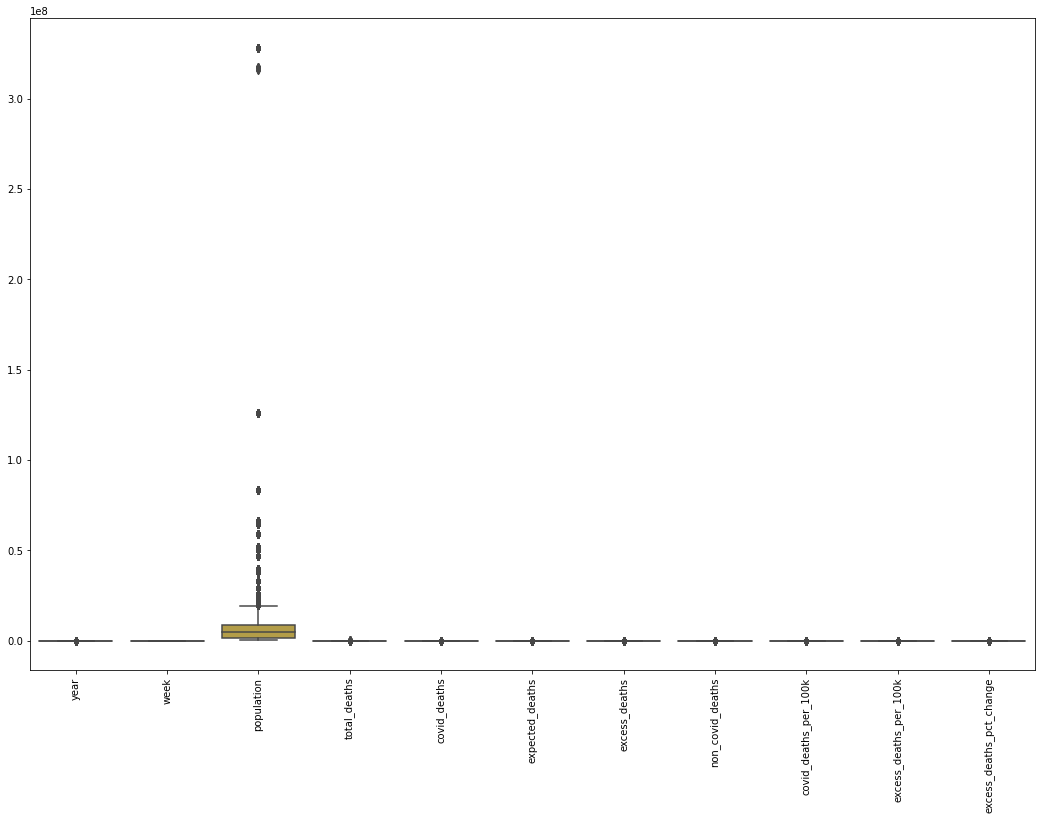

In [189]:

plt.figure(figsize=(18,12))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

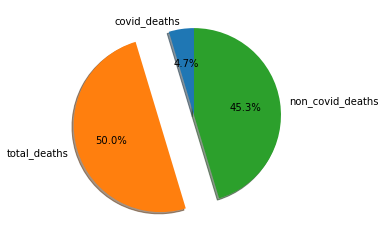

In [167]:
labels = 'covid_deaths','total_deaths','non_covid_deaths'
sizes = [1834317.5 , 5616804,17856580.5
]
explode = (0, 0.4, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# compare between  covid_deaths , total_deaths , non_covid_deaths in 2020

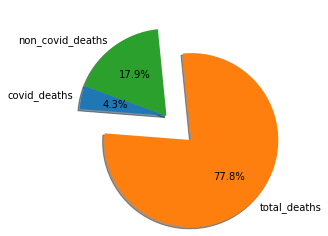

In [182]:
labels = 'covid_deaths','total_deaths','non_covid_deaths'
sizes = [1094289.0 , 19690898, 4522515.0]

explode = (0, 0.4, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=160)
 # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# compare between  covid_deaths , total_deaths , non_covid_deaths in 2021